In [1]:
import datetime
import os

import plotly.plotly as py
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from plotly.graph_objs import *
import plotly.graph_objs as go

import numpy as np

from obs_data import *

print(os.getcwd())

/Users/DayTightChunks/Documents/PhD/Models/.nosync/pesti-beach16/Analysis


In [2]:
init_notebook_mode(connected=True)

In [3]:
variable = "d13C"
figname = 'Soilsd13C.png'

## Observed

In [4]:
n_obs = getSoilData("North", tss=True)
v_obs = getSoilData("Valley", tss=True)
s_obs = getSoilData("South", tss=True)
s_obs.head()

,DayMoYr,Date,Jdays,ID,Transect,Wnum,Date.Soil,Date.ti,Conc.mug.g.dry.soil,Conc.ComSoil.SD,Mass.Soil.g,theta.prct,N_compsoil,comp.d13C,comp.d13C.SD,N_isoComp,prctError,DD13C.comp,comp.IMP.d13C
0,2015-10-01,01/10/2015,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2015-10-02,02/10/2015,2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2015-10-03,03/10/2015,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2015-10-04,04/10/2015,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2015-10-05,05/10/2015,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
if variable == "d13C":
    name = "comp.d13C"
nConc = n_obs[name].tolist()
vConc = v_obs[name].tolist()
sConc = s_obs[name].tolist()

## Simulated

In [34]:
# Model version and mc-run number:
version = "v10"
folder = "1"

# Working computer
PC = False
if PC:
    back = "\\"  
    sim_path = version + back  
else:
    back = "/"
    sim_path = version + back
    
print(sim_path)

v10/


In [35]:
col = 'sim' # variable + '.North'
transect = 'nor'
name_tss = 'dC13'
filename = "resM_" + transect + name_tss + ".tss"

c_north_sim = pd.read_table(sim_path + folder + back + filename, 
                            skiprows=4, delim_whitespace=True,
                            names=['Jdays', col],
                            header=None)

simN = c_north_sim[col].tolist()

In [36]:
transect = 'val'
name_tss = 'dC13'
filename = "resM_" + transect + name_tss + ".tss"
c_val_sim = pd.read_table(sim_path + folder + back + 
                          filename, 
                          skiprows=4, delim_whitespace=True,
                          names=['Jdays', col],
                          header=None)

simV = c_val_sim[col].tolist()

In [37]:
transect = 'sou'
name_tss = 'dC13'
filename = "resM_" + transect + name_tss + ".tss"
c_sou_sim = pd.read_table(sim_path + folder + back + 
                          filename, skiprows=4, delim_whitespace=True,
                          names=['Jdays', col],
                          header=None)

simS = c_sou_sim[col].tolist()

## Plotting

In [38]:
# Julian days
x = s_obs.Jdays.tolist()

start = 180
end = 300

### Observed

In [39]:
nObs = go.Scatter(
    x = x[start:end],
    y = nConc[start:end],
    mode = 'markers',
    name = 'North '  + variable,
    marker=dict(
        color= 'red', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=10)
)

vObs = go.Scatter(
    x = x[start:end],
    y = vConc[start:end],
    mode = 'markers',
    name = 'Valley ' + variable,
    marker=dict(
        color= 'green', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=10)
)

sObs = go.Scatter(
    x = x[start:end],
    y = sConc[start:end],
    mode = 'markers',
    name = 'South ' + variable,
    marker=dict(
        color= 'blue', # 'rgba(204, 204, 204, 0.95)',
        line=dict(
            color= 'black', #'rgba(217, 217, 217, 1.0)',
            width=1,
        ),
        symbol='circle',
        size=10)
)

### Simulated

In [40]:
traceN = go.Scatter(
    x = x[start:end],
    y = simN[start:end],
    mode = 'lines',
    name = 'North Sim.',
    marker=dict(
        color= 'red')
)

traceV = go.Scatter(
    x = x[start:end],
    y = simV[start:end],
    mode = 'lines',
    name = 'Valley Sim.',
    marker=dict(
        color='green')
)

traceS = go.Scatter(
    x = x[start:end],
    y = simS[start:end],
    mode = 'lines',
    name = 'South Sim.',
    marker=dict(
        color= 'blue')
)


In [41]:
data = [nObs, vObs, sObs, traceN, traceV, traceS]

In [42]:
%matplotlib inline
import plotlycred

online = False
if online:
    # fig = py.iplot(data) 
    fig = go.Figure(data=data) # , layout=layout)
    py.image.save_as(fig, filename=figname)
else:
    iplot(data)


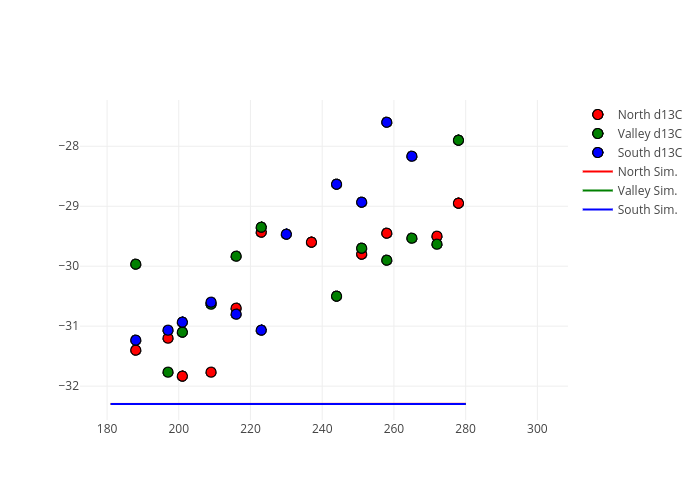

In [63]:
from IPython.display import Image
if online:
    i = Image(figname)
    display(i)